In [1]:
import numpy, scipy
import matplotlib.pyplot as mp
import netCDF4
import mpl_toolkits
from mpl_toolkits import basemap

% matplotlib inline

In [2]:
season='djf'
#season='mam'
#season='jja'
#season='son'
#season='annual'

In [3]:
model_names = numpy.array(( \
'ACCESS1-0', \
'ACCESS1-3', \
'bcc-csm1-1-m', \
'bcc-csm1-1', \
'BNU-ESM', \
'CanESM2', \
'CCSM4', \
'CESM1-BGC', \
'CESM1-CAM5', \
'CMCC-CESM', \
'CMCC-CM', \
'CMCC-CMS', \
'CNRM-CM5', \
'CSIRO-Mk3-6-0', \
'EC-EARTH', \
'FGOALS-g2', \
'GFDL-CM3', \
'GFDL-ESM2G', \
'GFDL-ESM2M', \
'GISS-E2-H', \
'GISS-E2-R', \
'HadGEM2-AO', \
'HadGEM2-CC', \
'HadGEM2-ES', \
'inmcm4', \
'IPSL-CM5A-LR', \
'IPSL-CM5A-MR', \
'IPSL-CM5B-LR', \
'MIROC5', \
'MIROC-ESM-CHEM', \
'MIROC-ESM', \
'MPI-ESM-LR', \
'MPI-ESM-MR', \
'MRI-CGCM3', \
'NorESM1-ME', \
'NorESM1-M' ))

In [4]:
# example file to get lat/lon info
ncfile = netCDF4.Dataset('CMIP5_climatologies_anomalies_agreement.nc', 'r', format='NETCDF4')
model_lat = ncfile.variables['lat'][:]
model_lon = ncfile.variables['lon'][:]

agreement_positive = ncfile.variables['agreement'][:]
pvals_array = ncfile.variables['ttest_pvals'][:]
hist_mmem_clim = ncfile.variables['hist_clim'][:]
rcp_mmem_clim = ncfile.variables['rcp_clim'][:]
rcp_minus_hist = ncfile.variables['rcp_minus_hist'][:]

36.0 0.0


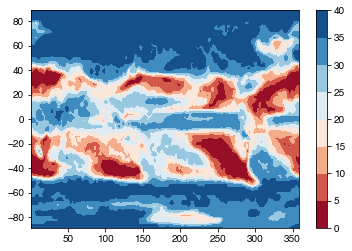

In [15]:
cf = mp.contourf(model_lon, model_lat, agreement_positive, cmap='RdBu')
mp.colorbar(cf)
print(agreement_positive.max(), agreement_positive.min())

/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a no

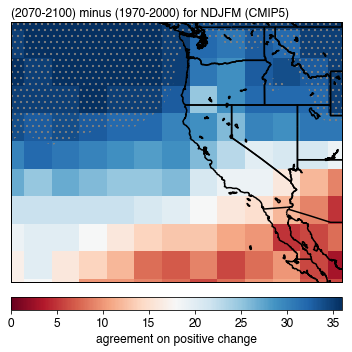

In [12]:
fontsize=12
contour_levels = numpy.arange(0,2.21,0.1)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=25.9,urcrnrlat=49.5,llcrnrlon=220.,urcrnrlon=250.,resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
# draw parallels and meridians. # labels[left, right, top, bottom]
#map.drawparallels(numpy.arange(-80.,81.,5.), labels=[1,0,0,0], dashes=[3,2], fontsize=fontsize, color='0')
#map.drawmeridians(numpy.arange(-180.,181.,10.), labels=[0,0,0,1], dashes=[3,2], fmt=format_every_other, fontsize=fontsize, color='0')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
pr_map = map.pcolormesh(xi, yi, agreement_positive, cmap='RdBu', zorder=2, vmin=0, vmax=36, ax=ax, latlon=True)
pr_stipple = map.contourf(xi, yi, agreement_positive, colors='None', hatches=['..',None,'..'], levels=[-0.5,2.5,33.5,36.5], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('agreement on positive change', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='(2070-2100) minus (1970-2000) for NDJFM (CMIP5)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('agreement_plot_NDJFM_CMIP5.pdf', transparent=True, bbox_inches='tight')

/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


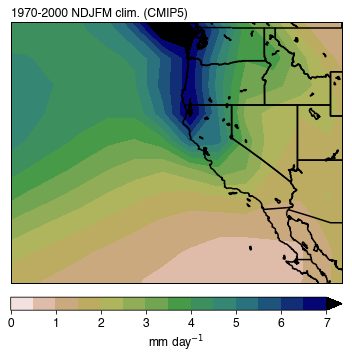

In [16]:
fontsize=12
contour_levels = numpy.arange(0,7.1,0.5)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=25.9,urcrnrlat=49.5,llcrnrlon=220.,urcrnrlon=250.,resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
#pr_map = map.pcolormesh(xi, yi, hist_mmem_clim, cmap='RdBu', zorder=2, vmin=0, vmax=40, ax=ax, latlon=True)
pr_map = map.contourf(xi, yi, hist_mmem_clim, \
                      cmap='gist_earth_r', zorder=2, \
                      levels=contour_levels, \
                      extend='max', \
                      ax=ax, latlon=True)
#pr_stipple = map.contourf(xi, yi, agreement_positive, colors='None', hatches=['..',None,'..'], levels=[-0.5,2.5,37.5,40.5], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='1970-2000 NDJFM clim. (CMIP5)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('historical_climatology_NDJFM_CMIP5.pdf', transparent=True, bbox_inches='tight')

/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


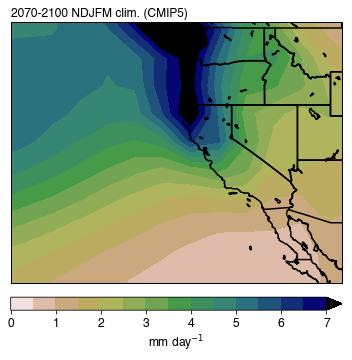

In [17]:
fontsize=12
contour_levels = numpy.arange(0,7.1,0.5)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=25.9,urcrnrlat=49.5,llcrnrlon=220.,urcrnrlon=250.,resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
#pr_map = map.pcolormesh(xi, yi, hist_mmem_clim, cmap='RdBu', zorder=2, vmin=0, vmax=40, ax=ax, latlon=True)
pr_map = map.contourf(xi, yi, rcp_mmem_clim, \
                      cmap='gist_earth_r', zorder=2, \
                      levels=contour_levels, \
                      extend='max', \
                      ax=ax, latlon=True)
#pr_stipple = map.contourf(xi, yi, agreement_positive, colors='None', hatches=['..',None,'..'], levels=[-0.5,2.5,37.5,40.5], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='2070-2100 NDJFM clim. (CMIP5)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('rcp85_climatology_NDJFM_CMIP5.pdf', transparent=True, bbox_inches='tight')

/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


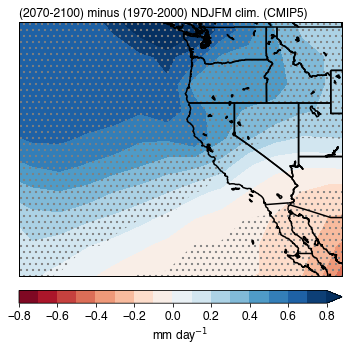

In [21]:
fontsize=12
contour_levels = numpy.arange(-0.8,0.81,0.1)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=25.9,urcrnrlat=49.5,llcrnrlon=220.,urcrnrlon=250.,resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
#pr_map = map.pcolormesh(xi, yi, hist_mmem_clim, cmap='RdBu', zorder=2, vmin=0, vmax=40, ax=ax, latlon=True)
pr_map = map.contourf(xi, yi, rcp_minus_hist, \
                      cmap='RdBu', zorder=2, \
                      levels=contour_levels, \
                      extend='max', \
                      ax=ax, latlon=True)
pr_stipple = map.contourf(xi, yi, pvals_array, colors='None', hatches=['..',None], levels=[0,0.01], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='(2070-2100) minus (1970-2000) NDJFM clim. (CMIP5)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('rcp85_minus_historical_climatology_NDJFM_CMIP5.pdf', transparent=True, bbox_inches='tight')

/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/baird/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a no

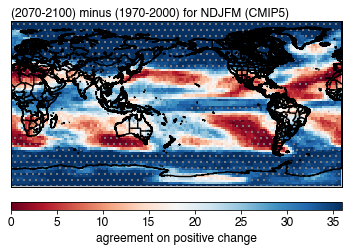

In [10]:
fontsize=12
contour_levels = numpy.arange(0,2.21,0.1)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0.,urcrnrlon=360.,resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
# draw parallels and meridians. # labels[left, right, top, bottom]
#map.drawparallels(numpy.arange(-80.,81.,5.), labels=[1,0,0,0], dashes=[3,2], fontsize=fontsize, color='0')
#map.drawmeridians(numpy.arange(-180.,181.,10.), labels=[0,0,0,1], dashes=[3,2], fmt=format_every_other, fontsize=fontsize, color='0')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
pr_map = map.pcolormesh(xi, yi, agreement_positive, cmap='RdBu', zorder=2, vmin=0, vmax=36, ax=ax, latlon=True)
pr_stipple = map.contourf(xi, yi, agreement_positive, colors='None', hatches=['..',None,'..'], levels=[-0.5,2.5,33.5,36.5], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('agreement on positive change', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='(2070-2100) minus (1970-2000) for NDJFM (CMIP5)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
#mp.savefig('agreement_plot_NDJFM_cmip5_ensemble.pdf', transparent=True, bbox_inches='tight')